<a href="https://colab.research.google.com/github/PikoAll/machine-learning-e-deep-learning/blob/main/Lavorare_con_dati_senza_etichette_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Apprendimento senza supervisione
Clustering
#K-means


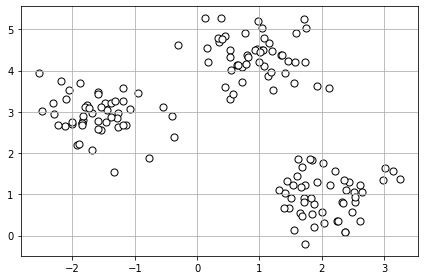

In [ ]:
from sklearn.datasets import make_blobs  #dataset
X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], 
            c='white', marker='o', edgecolor='black', s=50)
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_01.png', dpi=300)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

km=KMeans(n_clusters=3,   #numero centroidi
          init='random',
          n_init=10,     #numero ripetizione aggiustamento centroidi
          max_iter=300,  #numero massimo per ciascuna iterazione
          tol=1e-04,
          random_state=0)

yKm=km.fit_predict(X)

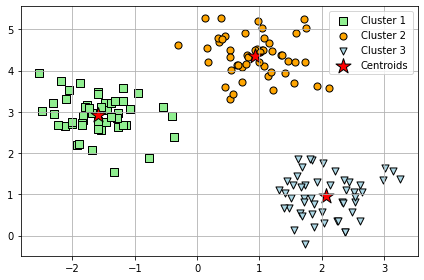

In [ ]:
plt.scatter(X[yKm == 0, 0],
            X[yKm == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 1')
plt.scatter(X[yKm == 1, 0],
            X[yKm == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Cluster 2')
plt.scatter(X[yKm == 2, 0],
            X[yKm == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='Cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='Centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_02.png', dpi=300)
plt.show()

Metodo per trovare il numero ottimale di cluster, data limmaggine successiva, vedere il comito della curva dove siferma diciamo, cosi quel punto indica il numero di cluster utili ottimali

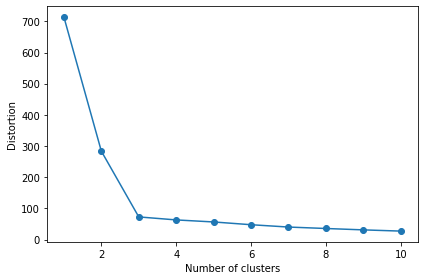

In [ ]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
#plt.savefig('images/11_03.png', dpi=300)
plt.show()